<font size = 6><h1 align = center>Using the GalPop Class </h1 ></font>      

<font size = 4><h2 align = center> Derek Sikorski </font><h2>

---
---
---


**Necessities:** 

Before getting started, make sure you have:
1. The GalPop Class file downloaded
2. The file of GalPop example objects
3. The outputs of the Hyperion find_peaks.py run
4. A drink
5. The following packages...

In [1]:
# Run me #
import os
import numpy as np
from GalPop import GalPop
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astropy.io import fits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm

<font size = 5><h2 align = center> Loading Files </font></h2>

GalPops is meant to store all of the useful Galaxy information you may in a way that is easy to manipulate. Unique methods can then be added directly to the class based on the user's need to avoid tedious coding in the future.

First, let's load in the GalPop objects. GalPop has a classmethod called 'load_file'. Let's use this to load the objects in...

In [2]:
## Loading in GalPops ##

path_to_gps = 'Final_GPs/'      # Folder containing GalPops
gps = [GalPop.load_file(path_to_gps+p) for p in os.listdir(path_to_gps)]

gp0 = gps[0]        # Pull out the first GalPop for use

----
----
----

<font size = 5><h2 align = center> Class Attributes </font></h2>


So now all of the GalPops are stored in a list, and we've pulled out one (gp0) to mess around with. First, let's see what it contains.

Every GalPop *necessarily has three attributes*:   

- **IDs:** A set of *unique* identifiers for the galaxies. Note, you could in theory have multiple copies of the same galaxy in a population (e.g. different masses corresponding to different LePhare runs), but they would need unique identifiers
- **coords:** A set of coordinates for each galaxy in the form [RA, Dec, z]
- **ms:** The galaxy masses

These are all specified upon creating a GalPop instance. If one is not really needed for analysis, you could always pass an empty list in. Let's see what these look like...

In [3]:
## Check out required attributes ##
print("IDs \t shape = ", gp0.IDs.shape, '\n', gp0.IDs)
print("\nCoords \t shape = ", gp0.coords.shape, '\n', gp0.coords)
print("\nms \t shape = ", gp0.ms.shape, '\n', gp0.ms)


IDs 	 shape =  (49787,) 
 [ 333895  333946  333948 ... 1380611 1380631 1383539]

Coords 	 shape =  (49787, 3) 
 [[150.39358738   1.74003636   2.2317    ]
 [149.90807428   1.74013396   2.3625    ]
 [150.30390908   1.74019907   2.6507    ]
 ...
 [150.36612021   2.72699653   2.505     ]
 [149.88738388   2.72984726   2.5       ]
 [150.15061994   2.72649822   2.0999999 ]]

ms 	 shape =  (49787,) 
 [ 9.18312988  8.40914958  8.73676627 ...  9.64066263  9.95
 10.65      ]


---

There are three optional attributes upon creation as well:
- **mags:** A dictionary containing magnitudes specified by the user
- **verbose:** A boolean for whether or not to be verbose
- **misc:** A dictionary containing any miscellaneous values

Typically, I leave verbose as false unless I'm troubleshooting something... Let's see what the dictionaries store:

In [4]:
## Check out optional attributes ##
print(list(gp0.mags.keys()))
print(list(gp0.misc.keys()))

['NUV_ABS', 'u_ABS', 'r_ABS', 'V_ABS', 'J_ABS', 'IRAC']
['EBV', 'Model', 'Ext_law', 'Age', 'SFRs', 'obs_types']


As we can see, this object already has some magnitudes and miscellaneous values stored for each galaxy from my LePhare runs. What do these look like?

In [5]:
print("IRAC \t shape = ", gp0.mags['IRAC'].shape, '\n', gp0.mags['IRAC'])
print("\nSFRs \t shape = ", gp0.misc['SFRs'].shape, '\n', gp0.misc['SFRs'])


IRAC 	 shape =  (49787,) 
 [24.457018 24.898384 25.068796 ... 23.458593 20.039022 21.378204]

SFRs 	 shape =  (49787,) 
 [0.71223986 0.33630911 0.35540694 ... 1.19587966 2.6        2.60000002]


There's a pattern here. **The arrays pretty much always have the same shape as self.IDs**. This class just really a big storage file that can then be used to manipulate things within specific class methods. It eliminates clunky functions from your workspace.

----

Finally, when loading a GalPop file there are numerous "internal" attributes that get loaded as well. These are mostly defined within class methods and are often times less physical and more analysis driven. So, rather than going through them all, I'll talk about the methods that define them...

---
---
---


<font size = 5><h2 align = center> Class Methods </font></h2>


Although I've created some methods already, the nice thing about how GalPop stores things is that it should be easy to add methods specific to some science you're studying. All of the data is already stored within the object, so you can write functions within the object and run them in a cleaner workspace. Let's see a few

**Assigning Overdensities**

Given the setup of find_peaks.py, it's important we're able to assign an overdensity to each galaxy. Luckily GalPops already has a method for this.
- Note this is just an example as all GalPop objects I've posted already have this information stored and ready for use

The first thing to do is pass in a overdensity cube from make_cube_final_overdense.py to assign an $n_\sigma$ to each galaxy. That is, the number of standard deviations above the average overdensity the galaxy is. This works by assigning each galaxy to a voxel from the cube, finding the overdensity of the voxel, and standard deviation from the cube.

In [6]:
## Assign n_sigma ##

# Pass in VMC cube
sig_cube = fits.open(r"C:\Users\sikor\OneDrive\Desktop\benpy\FinalTry\Hyperion_interpolated_cube_sigma.fits")

# Find n_sigma
gp0.update_n_sigmas(sig_cube)       # Note this automatically updates voxels and overdensities as well

print("Some internal Attributes: ")
print("\nVoxels \t shape = ", gp0.voxels.shape, '\n', gp0.voxels)
print("\nODs \t shape = ", gp0.ODs.shape, '\n', gp0.ODs)
print("\nn_sigmas \t shape = ", gp0.n_sigmas.shape, '\n', gp0.n_sigmas)


Some internal Attributes: 

Voxels 	 shape =  (49787, 3) 
 [[109  33 127]
 [309  34 193]
 [146  34 320]
 ...
 [120 441 259]
 [317 442 257]
 [209 441  54]]

ODs 	 shape =  (49787,) 
 [-0.01846767 -0.07585268  0.15185452 ...  0.18987969  0.05833605
 -0.04706129]

n_sigmas 	 shape =  (49787,) 
 [-0.10334037 -0.79239801  1.63102001 ...  2.23290016  0.76214391
 -0.38912065]


---

**Assigning Peaks**

Another important step when working with structures is actually assigning the galaxies to peaks from find_peaks.py. This information is then stored in the self.pks dictionary. This can be a bit time-consuming, so I usually try and run this before posting as well.

After running the previous method, the voxels and $n_\sigma$ values have been assigned to each galaxy and stored as internal attributes. These are then used in the assign_peaks method, along with outputs from find_peaks itself. Let's try running this for a few values of $n_\sigma$.

- Note because this can be time-consuming, the user must specify they want to overwrite the peak info as a parameter to avoid any accidents. The code below should only take a few seconds though

In [7]:
## Assigning peaks ##
sigs = np.arange(4.0, 5.5, 0.5)     # Our sigma-thresholds to define the peaks

# Path to find_peaks info
pk_sums = [rf"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\peaks_sig{s}.dat" for s in sigs]   # Peak summary files
pk_folders = [rf"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\sig{s}_peaks" for s in sigs]

# Assign peaks
gp0.assign_peaks(sigs, pk_sums, pk_folders, overwrite=True)

# Print output
print("Internal attribute: ")
print("\npks keys: \n", gp0.pks.keys())
print("\nFirst 15 elements of a few entries in self.pks:")
print(f"\n sigma = 2.0 \t", gp0.pks[2.0][:15])

for s in sigs:
    print(f"\n sigma = {s} \t", gp0.pks[s][:15])

Internal attribute: 

pks keys: 
 dict_keys([2.0, 2.25, 2.3, 2.35, 2.4, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

First 15 elements of a few entries in self.pks:

 sigma = 2.0 	 [-99 -99 -99 -99 -99 -99 -99 -99 -99 -99  44 103 -99 -99 -99]

 sigma = 4.0 	 [-99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99]

 sigma = 4.5 	 [-99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99]

 sigma = 5.0 	 [-99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99]


You can notice a few things:

- Why are there so many entries in self.pks when we only ran for sigma = 4.0, 4.5, 5.0?
    - I've already ran assign_peaks for the objects. The lower the sigma, the longer it takes (because more galaxies are assigned to peaks)

- Why are there so many -99's?
    - This is when a galaxy is not assigned to a peak. As you can see, most galaxies actually aren't located in structures. But we see in the sigma = 2.0 case there are a few that are located in peaks

We can find the actual peak distribution for the sigma= 4.0 peaks:

In [8]:
from collections import Counter

print('Number of galaxies: ', len(gp0.IDs))
print(Counter(gp0.pks[4.0]))

Number of galaxies:  49787
Counter({-99: 49647, 8: 12, 23: 11, 1: 8, 19: 7, 4: 6, 7: 5, 5: 5, 41: 5, 9: 4, 30: 4, 128: 3, 86: 3, 48: 3, 44: 3, 6: 3, 2: 3, 43: 3, 68: 2, 3: 2, 83: 2, 10: 2, 64: 2, 141: 2, 57: 2, 28: 2, 45: 2, 75: 2, 11: 2, 13: 2, 69: 2, 84: 1, 20: 1, 82: 1, 52: 1, 144: 1, 16: 1, 129: 1, 157: 1, 27: 1, 47: 1, 91: 1, 72: 1, 12: 1, 37: 1, 17: 1, 22: 1, 35: 1, 197: 1, 14: 1, 67: 1, 21: 1, 78: 1, 191: 1, 207: 1, 29: 1, 142: 1})


Clearly of the ~50k galaxies in the Population, most are not located in peaks defined over 4-sigma. One last note is that these "peaks" here are not even necessarily structures as we haven't made a mass-cut yet. That comes next...

---

**Defining Subpopulations**

This is one of the biggest features of GalPops - the ability to define 'subpopulations'. This is how we go about defining our field samples and really whatever other samples we're curious about. Since I'm working with Hyperion Stellar Mass Functions, I'll just go about doing defining what I need for that as an example.

First, let's define a field population. For this, I want to make a more stringent cut on the GalPop to consider -- namely let's require an IRAC mag of $\leq$ 25.0. Then, I'll define two different field populations straddeling Hyperion in redshift-space. They are at redshifts:
1. $2.15 \leq z \leq 2.25$
2. $2.8 \leq z \leq 2.9$

I also need to specify how I'm defining the peaks themselved. For both of these, I'm using a sigma=2.25 threshold to define the peaks. I also require the peaks have at least one voxel with $n_\sigma \geq 4.0$ and $\log(M) \geq 13$. 

Once I define the subpopulations, they are stored individually as boolean arrays in self.subpops. The last step then is to create a final 'field' subpop that combines the two.

In [9]:
## Define Field Pops ##

# Files for peak definition
sig_sum = r"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\peaks_sig2.25.dat"
sig_folder = r"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\sig2.25_peaks"

# Some extra constraints
sub_samp1 = np.where( (gp0.mags['IRAC'] <= 25 ) & (gp0.coords[:,2] >= 2.15) & (gp0.coords[:,2] <= 2.25))
sub_samp2 = np.where( (gp0.mags['IRAC'] <= 25 ) & (gp0.coords[:,2] >= 2.8) & (gp0.coords[:,2] <= 2.9))

# Make field populations
gp0.make_subpop('field1', True, [2.25, 4.0, 13], sig_sum, sig_folder, gal_sample=sub_samp1)
gp0.make_subpop('field2', True, [2.25, 4.0, 13], sig_sum, sig_folder, gal_sample=sub_samp2)

# Combine into one field pop
gp0.modify_subpops("field", 'field1', ['field2'], include=True)

The results of this code are a few boolean arrays and some Volume calculations corresponding to the subpops. Let's take a look

In [10]:
print('Field subpop:  ')
print(gp0.subpops['field'])
print('Field Volume (cMpc^3):   ')
print(gp0.vols['field'])

Field subpop:  
[ True False False ... False False False]
Field Volume (cMpc^3):   
2228568.7801123345


Note with this form, it's easy to then slice up out GalPop to use the galaxy information accordingly. For instance, let's make a 3d plot of the different field populations with a colorbar corresponding to $n_\sigma$. You can flip between field1, field2, and field in the first line of the code to plot the different populations. 

This could easily be added as a method in GalPops if needed. All you'd need to do is add a 'plot_subpop' method with a single parameter -- the key name of the subpopulation you're plotting. Then you could pretty much copy and past this code.

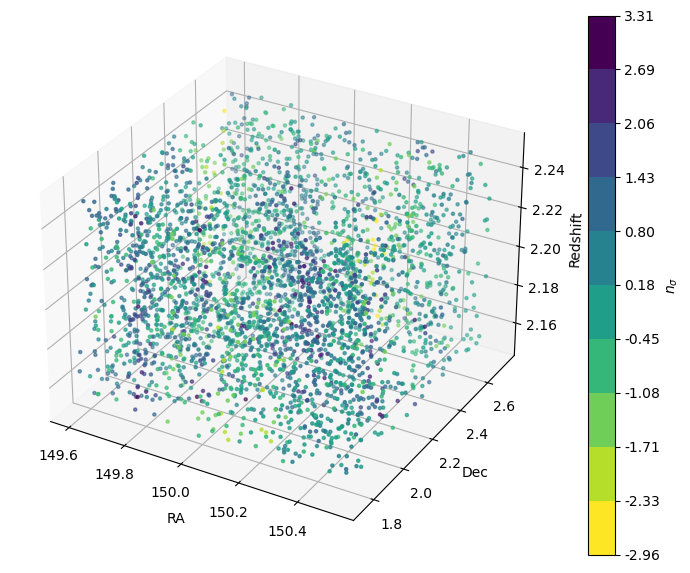

In [11]:
field_idxs = gp0.subpops['field1']  # Flip between field1, field2, and field !
# Create bins and binned colors
bins = np.linspace(gp0.n_sigmas[field_idxs].min(), gp0.n_sigmas[field_idxs].max(), 10 + 1)

# Create a colormap and norm for discrete bins
cmap = ListedColormap(plt.cm.viridis(np.linspace(1,0, 10)))  # Flip colormap
norm = BoundaryNorm(bins, 10)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter( gp0.coords[field_idxs, 0],gp0.coords[field_idxs, 1],gp0.coords[field_idxs, 2],
                        c=gp0.n_sigmas[field_idxs],cmap=cmap,norm=norm,s=5)

# Add a colorbar with labels
cbar = fig.colorbar(scatter,ax=ax,boundaries=bins,ticks=bins,orientation='vertical',label=r'$n_\sigma$')
cbar.ax.set_yticklabels([f"{bins[i]:.2f}" for i in range(len(bins))])  # Explicit tick labels

# Label axes
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_zlabel("Redshift")

# Show plot
plt.show()


Alright, let's actually define Hyperion now. We know Hyperion is peak 1 of the sigma=2.25 file, so we can use that to slice our galaxy sample beforehand. First, we're going to define different subpopulations of Hyperion based on minimum sigma-thresholds with no maximum-sigma cutoff. Since we know Hyperion is a supercluster, we'll update our peak definition to have a sigma requirement and mass requirement of -99. This is manily in case one of the $n_\sigma \geq 4.5$ peaks doesn't have a high mass.

In [ ]:
## Defining Hyperion ##

Hyp_samp = np.where( (gp0.mags['IRAC'] <= 25.0) & (gp0.pks[2.25] == 1))  # Only consider Hyperion Galaxies with IRAC <= 25

## Assigning peaks ##
sigs  = np.concatenate([ [2.25] , np.arange(2.5,5.5,0.5) ])

# Path to find_peaks info
pk_sums = [rf"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\peaks_sig{s}.dat" for s in sigs]   # Peak summary files
pk_folders = [rf"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\sig{s}_peaks" for s in sigs]

for _id, s in enumerate(sigs):
    gp0.make_subpop(f'Hyp{s}', False, [s, -99, -99], pk_sums[_id], pk_folders[_id], gal_sample=Hyp_samp)

We can again plot the Hyperion populations. Try changing which subpopulation is plotted.

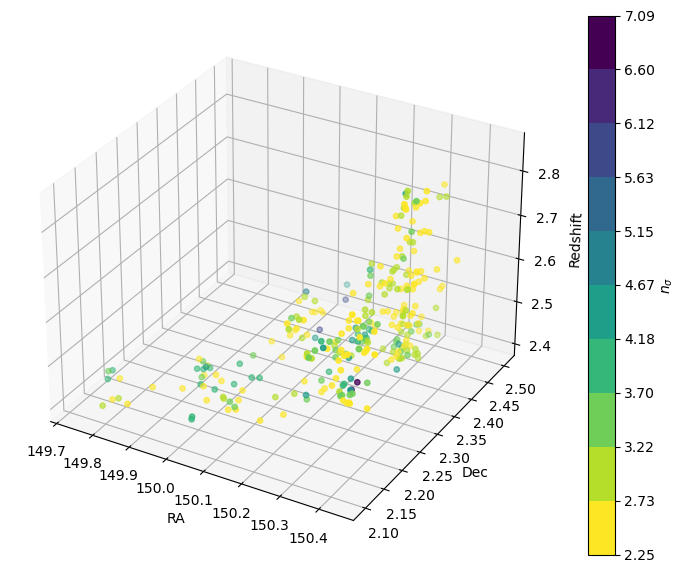

In [44]:
field_idxs = gp0.subpops['Hyp2.25']  # Flip between field1, field2, and field !
# Create bins and binned colors
bins = np.linspace(2.25, gp0.n_sigmas[field_idxs].max(), 10 + 1)

# Create a colormap and norm for discrete bins
cmap = ListedColormap(plt.cm.viridis(np.linspace(1,0, 10)))  # Flip colormap
norm = BoundaryNorm(bins, 10)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter( gp0.coords[field_idxs, 0],gp0.coords[field_idxs, 1],gp0.coords[field_idxs, 2],
                        c=gp0.n_sigmas[field_idxs],cmap=cmap,norm=norm,s=15)

# Add a colorbar with labels
cbar = fig.colorbar(scatter,ax=ax,boundaries=bins,ticks=bins,orientation='vertical',label=r'$n_\sigma$')
cbar.ax.set_yticklabels([f"{bins[i]:.2f}" for i in range(len(bins))])  # Explicit tick labels

# Label axes
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_zlabel("Redshift")

# Show plot
plt.show()


Finally, what if we want to discretize the Hyperion overdensity bins. Let's say I want galaxies that have $n_\sigma \in [2.5, 3.0)$, $n_\sigma \in [3.0, 3.5)$, etc. To do this, we again use the modify_subpop method

In [45]:
## Make discrete bins ##
for _id, s in enumerate(sigs[:-1]):
    gp0.modify_subpops(f'Hyp{s}_{sigs[_id+1]}', f'Hyp{s}', [f'Hyp{sigs[_id+1]}'], include=False)

So, now we have some new subpops that are discrete in that they exclude galaxies in the sigma-thresholds above them. This is also propogated to the self.vols attribute, where the volume of the excluded population is subtracted (though this can be a bit finicky). Let's see what this looks like:

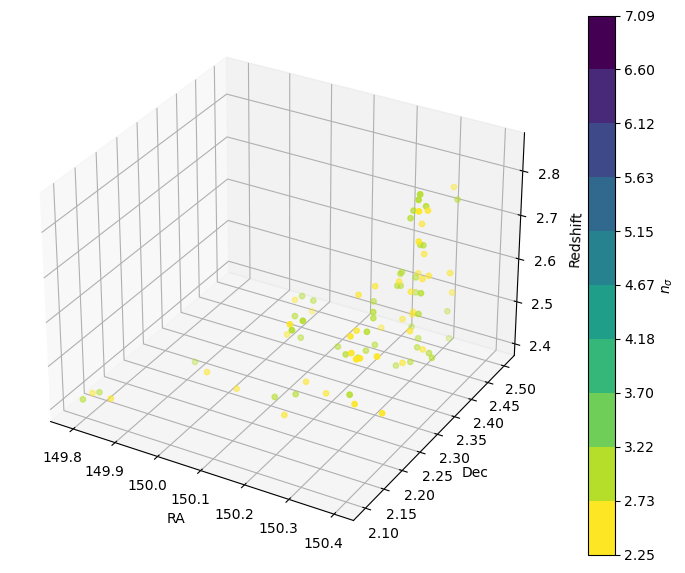

In [47]:
field_idxs = gp0.subpops['Hyp2.5_3.0']  # Flip between field1, field2, and field !
# Create bins and binned colors
bins = np.linspace(2.25, gp0.n_sigmas[gp0.subpops['Hyp2.25']].max(), 10 + 1)

# Create a colormap and norm for discrete bins
cmap = ListedColormap(plt.cm.viridis(np.linspace(1,0, 10)))  # Flip colormap
norm = BoundaryNorm(bins, 10)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter( gp0.coords[field_idxs, 0],gp0.coords[field_idxs, 1],gp0.coords[field_idxs, 2],
                        c=gp0.n_sigmas[field_idxs],cmap=cmap,norm=norm,s=15)

# Add a colorbar with labels
cbar = fig.colorbar(scatter,ax=ax,boundaries=bins,ticks=bins,orientation='vertical',label=r'$n_\sigma$')
cbar.ax.set_yticklabels([f"{bins[i]:.2f}" for i in range(len(bins))])  # Explicit tick labels

# Label axes
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_zlabel("Redshift")

# Show plot
plt.show()

---
---
---


Finally, you can save the GalPop object. Doing so saves all of the attributes of the object so that when you load it in, you don't have to rerun things. Depending on the number of subpops you've made, this could potentially lead to a bit of a big file. Therefore, you can also exclude some attributes when saving -- you'll just have to run some functions again when you load them in. Let's try it

In [51]:
## Save File ##
gp0.save_file('testGP', ex=['pks'])

That's pretty much it. If you have any good methods you've added to GalPops or find any bugs, let me know.